# Initialisation

In [2]:
import pandas as pd
import numpy as np 
import math
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame(columns = ["France","Allemagne (+LU)"],
    index=["Consommation totale [GWh]",
           "Consommation totale par habitant [kWh]",
           "Production totale [GWh]",
           "Production totale par habitant [kWh]",
           "Temps en sous-production [%]",
           "Temps en sous-production si que renouvelables [%]", 
           "Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable [%]",
           "Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production [%]",
           "Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - stockage zero pertes de 100W, 1000Wh /hab [%]",
           "Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production et stockage zero pertes 100W, 1000Wh /hab [%]"])
#df

In [4]:
LoadFR = pd.read_csv("Total Load - Day Ahead _ Actual_202301010000-202401010000 FR.csv")
#LoadFR

In [5]:
LoadDE = pd.read_csv("Total Load - Day Ahead _ Actual_202301010000-202401010000 DE.csv")
#LoadDE

In [6]:
ProdFR = pd.read_csv("Actual Generation per Production Type_202301010000-202401010000 FR.csv")
#ProdFR

In [7]:
ProdDE = pd.read_csv("Actual Generation per Production Type_202301010000-202401010000 DE.csv")
#ProdDE

# Analyse des consommations totales

In [8]:
TotalConsFR = LoadFR['Actual Total Load [MW] - BZN|FR'].sum()
print(TotalConsFR)

425428935.0


In [9]:
df ['France'][0]=round(TotalConsFR/1000,0)
df

,France,Allemagne (+LU)
Consommation totale [GWh],425429.0,NaN
Consommation totale par habitant [kWh],NaN,NaN
Production totale [GWh],NaN,NaN
Production totale par habitant [kWh],NaN,NaN
Temps en sous-production [%],NaN,NaN
Temps en sous-production si que renouvelables [%],NaN,NaN
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable [%],NaN,NaN
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production [%],NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - stockage zero pertes de 100W, 1000Wh /hab [%]",NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production et stockage zero pertes 100W, 1000Wh /hab [%]",NaN,NaN


In [10]:
TotalConsDE = LoadDE['Actual Total Load [MW] - BZN|DE-LU'].sum()/4
print(TotalConsDE)

461810723.0


In [11]:
df ['Allemagne (+LU)'][0]=round(TotalConsDE/1000,0)
df

,France,Allemagne (+LU)
Consommation totale [GWh],425429.0,461811.0
Consommation totale par habitant [kWh],NaN,NaN
Production totale [GWh],NaN,NaN
Production totale par habitant [kWh],NaN,NaN
Temps en sous-production [%],NaN,NaN
Temps en sous-production si que renouvelables [%],NaN,NaN
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable [%],NaN,NaN
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production [%],NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - stockage zero pertes de 100W, 1000Wh /hab [%]",NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production et stockage zero pertes 100W, 1000Wh /hab [%]",NaN,NaN


In [12]:
habDE=83.2e6+0.640e6
habFR=67.75e6

In [13]:
df ['Allemagne (+LU)'][1]=round(TotalConsDE*1000/habDE,0)
df

,France,Allemagne (+LU)
Consommation totale [GWh],425429.0,461811.0
Consommation totale par habitant [kWh],NaN,5508.0
Production totale [GWh],NaN,NaN
Production totale par habitant [kWh],NaN,NaN
Temps en sous-production [%],NaN,NaN
Temps en sous-production si que renouvelables [%],NaN,NaN
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable [%],NaN,NaN
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production [%],NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - stockage zero pertes de 100W, 1000Wh /hab [%]",NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production et stockage zero pertes 100W, 1000Wh /hab [%]",NaN,NaN


In [14]:
df ['France'][1]=round(TotalConsFR*1000/habFR,0)
df

,France,Allemagne (+LU)
Consommation totale [GWh],425429.0,461811.0
Consommation totale par habitant [kWh],6279.0,5508.0
Production totale [GWh],NaN,NaN
Production totale par habitant [kWh],NaN,NaN
Temps en sous-production [%],NaN,NaN
Temps en sous-production si que renouvelables [%],NaN,NaN
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable [%],NaN,NaN
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production [%],NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - stockage zero pertes de 100W, 1000Wh /hab [%]",NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production et stockage zero pertes 100W, 1000Wh /hab [%]",NaN,NaN


# Analyse des productions totales

In [15]:
SubTotalProdFR = ProdFR.sum(numeric_only = True)
#print(SubTotalProdFR)

In [16]:
TotalProdFR=SubTotalProdFR.sum()
#print(TotalProdFR)

In [17]:
df ['France'][2]=round(TotalProdFR/1000,0)
df

,France,Allemagne (+LU)
Consommation totale [GWh],425429.0,461811.0
Consommation totale par habitant [kWh],6279.0,5508.0
Production totale [GWh],481831.0,NaN
Production totale par habitant [kWh],NaN,NaN
Temps en sous-production [%],NaN,NaN
Temps en sous-production si que renouvelables [%],NaN,NaN
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable [%],NaN,NaN
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production [%],NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - stockage zero pertes de 100W, 1000Wh /hab [%]",NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production et stockage zero pertes 100W, 1000Wh /hab [%]",NaN,NaN


In [18]:
SubTotalProdDE = ProdDE.sum(numeric_only = True)/4
#print(SubTotalProdDE)

In [19]:
TotalProdDE=SubTotalProdDE.sum()
#print(TotalProdDE)

In [20]:
df ['Allemagne (+LU)'][2]=round(TotalProdDE/1000,0)
df

,France,Allemagne (+LU)
Consommation totale [GWh],425429.0,461811.0
Consommation totale par habitant [kWh],6279.0,5508.0
Production totale [GWh],481831.0,463628.0
Production totale par habitant [kWh],NaN,NaN
Temps en sous-production [%],NaN,NaN
Temps en sous-production si que renouvelables [%],NaN,NaN
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable [%],NaN,NaN
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production [%],NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - stockage zero pertes de 100W, 1000Wh /hab [%]",NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production et stockage zero pertes 100W, 1000Wh /hab [%]",NaN,NaN


In [21]:
df ['Allemagne (+LU)'][3]=round(TotalProdDE*1000/habDE,0)
df

,France,Allemagne (+LU)
Consommation totale [GWh],425429.0,461811.0
Consommation totale par habitant [kWh],6279.0,5508.0
Production totale [GWh],481831.0,463628.0
Production totale par habitant [kWh],NaN,5530.0
Temps en sous-production [%],NaN,NaN
Temps en sous-production si que renouvelables [%],NaN,NaN
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable [%],NaN,NaN
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production [%],NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - stockage zero pertes de 100W, 1000Wh /hab [%]",NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production et stockage zero pertes 100W, 1000Wh /hab [%]",NaN,NaN


In [22]:
df ['France'][3]=round(TotalProdFR*1000/habFR,0)
df

,France,Allemagne (+LU)
Consommation totale [GWh],425429.0,461811.0
Consommation totale par habitant [kWh],6279.0,5508.0
Production totale [GWh],481831.0,463628.0
Production totale par habitant [kWh],7112.0,5530.0
Temps en sous-production [%],NaN,NaN
Temps en sous-production si que renouvelables [%],NaN,NaN
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable [%],NaN,NaN
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production [%],NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - stockage zero pertes de 100W, 1000Wh /hab [%]",NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production et stockage zero pertes 100W, 1000Wh /hab [%]",NaN,NaN


# Analyse des durées de sous-production

In [23]:
timeProdDE = ProdDE.sum(numeric_only = True, axis=1)
timeSousProdDE = timeProdDE < LoadDE['Actual Total Load [MW] - BZN|DE-LU']

In [24]:
df ['Allemagne (+LU)'][4]=round(sum(timeSousProdDE)/len(ProdDE)*100,1)
df

,France,Allemagne (+LU)
Consommation totale [GWh],425429.0,461811.0
Consommation totale par habitant [kWh],6279.0,5508.0
Production totale [GWh],481831.0,463628.0
Production totale par habitant [kWh],7112.0,5530.0
Temps en sous-production [%],NaN,52.1
Temps en sous-production si que renouvelables [%],NaN,NaN
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable [%],NaN,NaN
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production [%],NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - stockage zero pertes de 100W, 1000Wh /hab [%]",NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production et stockage zero pertes 100W, 1000Wh /hab [%]",NaN,NaN


In [25]:
timeProdFR = ProdFR.sum(numeric_only = True, axis=1)
timeSousProdFR = timeProdFR < LoadFR['Actual Total Load [MW] - BZN|FR']

In [26]:
df ['France'][4]=round(sum(timeSousProdFR)/len(ProdFR)*100,1)
df

,France,Allemagne (+LU)
Consommation totale [GWh],425429.0,461811.0
Consommation totale par habitant [kWh],6279.0,5508.0
Production totale [GWh],481831.0,463628.0
Production totale par habitant [kWh],7112.0,5530.0
Temps en sous-production [%],10.6,52.1
Temps en sous-production si que renouvelables [%],NaN,NaN
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable [%],NaN,NaN
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production [%],NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - stockage zero pertes de 100W, 1000Wh /hab [%]",NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production et stockage zero pertes 100W, 1000Wh /hab [%]",NaN,NaN


# Analyse des durées de sous-production: si production exclusivement renouvelable

In [27]:
#ProdDE.columns

In [28]:
colRen=[ProdDE.columns[2],ProdDE.columns[10] ,ProdDE.columns[11], ProdDE.columns[13], 
     ProdDE.columns[14],ProdDE.columns[15], ProdDE.columns[17], ProdDE.columns[18], ProdDE.columns[19],
     ProdDE.columns[20], ProdDE.columns[21], ProdDE.columns[22]]
#col

In [29]:
timeProdRenDE = ProdDE[colRen].sum(numeric_only = True, axis=1)
#timeProdDE

In [30]:
timeSousProdRenDE = timeProdRenDE < LoadDE['Actual Total Load [MW] - BZN|DE-LU']

In [31]:
df ['Allemagne (+LU)'][5]=round(sum(timeSousProdRenDE)/len(ProdDE)*100,1)
df

,France,Allemagne (+LU)
Consommation totale [GWh],425429.0,461811.0
Consommation totale par habitant [kWh],6279.0,5508.0
Production totale [GWh],481831.0,463628.0
Production totale par habitant [kWh],7112.0,5530.0
Temps en sous-production [%],10.6,52.1
Temps en sous-production si que renouvelables [%],NaN,95.5
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable [%],NaN,NaN
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production [%],NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - stockage zero pertes de 100W, 1000Wh /hab [%]",NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production et stockage zero pertes 100W, 1000Wh /hab [%]",NaN,NaN


In [32]:
timeProdRenFR = ProdFR[colRen].sum(numeric_only = True, axis=1)
#timeProdFR

In [33]:
timeSousProdRenFR = timeProdRenFR < LoadFR['Actual Total Load [MW] - BZN|FR']

In [34]:
df ['France'][5]=round(sum(timeSousProdRenFR)/len(ProdFR)*100,1)
df

,France,Allemagne (+LU)
Consommation totale [GWh],425429.0,461811.0
Consommation totale par habitant [kWh],6279.0,5508.0
Production totale [GWh],481831.0,463628.0
Production totale par habitant [kWh],7112.0,5530.0
Temps en sous-production [%],10.6,52.1
Temps en sous-production si que renouvelables [%],99.9,95.5
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable [%],NaN,NaN
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production [%],NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - stockage zero pertes de 100W, 1000Wh /hab [%]",NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production et stockage zero pertes 100W, 1000Wh /hab [%]",NaN,NaN


# Augmentation necessaire des renouvelables solaires et éoliennes pour atteindre moins de 10% de temps de sous-production en production exclusivement renouvelable

In [35]:
ProdDE.columns

Index(['Area', 'MTU', 'Biomass  - Actual Aggregated [MW]',
       'Fossil Brown coal/Lignite  - Actual Aggregated [MW]',
       'Fossil Coal-derived gas  - Actual Aggregated [MW]',
       'Fossil Gas  - Actual Aggregated [MW]',
       'Fossil Hard coal  - Actual Aggregated [MW]',
       'Fossil Oil  - Actual Aggregated [MW]',
       'Fossil Oil shale  - Actual Aggregated [MW]',
       'Fossil Peat  - Actual Aggregated [MW]',
       'Geothermal  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  - Actual Consumption [MW]',
       'Hydro Run-of-river and poundage  - Actual Aggregated [MW]',
       'Hydro Water Reservoir  - Actual Aggregated [MW]',
       'Marine  - Actual Aggregated [MW]', 'Nuclear  - Actual Aggregated [MW]',
       'Other  - Actual Aggregated [MW]',
       'Other renewable  - Actual Aggregated [MW]',
       'Solar  - Actual Aggregated [MW]', 'Waste  - Actual Aggregated [MW]',
       'Wind Offshore  - Actual 

In [36]:
colRenScalable=[ProdDE.columns[19], ProdDE.columns[21], ProdDE.columns[22]]
colRenScalable

['Solar  - Actual Aggregated [MW]',
 'Wind Offshore  - Actual Aggregated [MW]',
 'Wind Onshore  - Actual Aggregated [MW]']

In [37]:
timeProdRenScalableDE = ProdDE[colRenScalable].sum(numeric_only = True, axis=1)
#timeProdRenScalableDE

In [38]:
FactorDE=6
timeSousProdRenDE = timeProdRenDE+timeProdRenScalableDE*FactorDE < LoadDE['Actual Total Load [MW] - BZN|DE-LU']
result=sum(timeSousProdRenDE)/len(ProdDE)*100
result

9.964615911425637

In [39]:
df ['Allemagne (+LU)'][6]=round((FactorDE)*100,0)
df

,France,Allemagne (+LU)
Consommation totale [GWh],425429.0,461811.0
Consommation totale par habitant [kWh],6279.0,5508.0
Production totale [GWh],481831.0,463628.0
Production totale par habitant [kWh],7112.0,5530.0
Temps en sous-production [%],10.6,52.1
Temps en sous-production si que renouvelables [%],99.9,95.5
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable [%],NaN,600
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production [%],NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - stockage zero pertes de 100W, 1000Wh /hab [%]",NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production et stockage zero pertes 100W, 1000Wh /hab [%]",NaN,NaN


In [40]:
timeProdRenScalableFR = ProdFR[colRenScalable].sum(numeric_only = True, axis=1)
#timeProdRenScalableFR

In [41]:
FactorFR=15.9
timeSousProdRenFR = timeProdRenFR+timeProdRenScalableFR*FactorFR < LoadFR['Actual Total Load [MW] - BZN|FR']
result=sum(timeSousProdRenFR)/len(ProdFR)*100
result

9.998858577787924

In [42]:
df ['France'][6]=round((FactorFR)*100,0)
df

,France,Allemagne (+LU)
Consommation totale [GWh],425429.0,461811.0
Consommation totale par habitant [kWh],6279.0,5508.0
Production totale [GWh],481831.0,463628.0
Production totale par habitant [kWh],7112.0,5530.0
Temps en sous-production [%],10.6,52.1
Temps en sous-production si que renouvelables [%],99.9,95.5
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable [%],1590.0,600
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production [%],NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - stockage zero pertes de 100W, 1000Wh /hab [%]",NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production et stockage zero pertes 100W, 1000Wh /hab [%]",NaN,NaN


# Augmentation necessaire des renouvelables solaires et éoliennes pour atteindre moins de 10% de temps de sous-production en exclusivement renouvelable - consommation de -10% en sous-production

In [43]:
FactorDE=5.2
timeSousProdRenDE_temp = timeProdRenDE+timeProdRenScalableDE*FactorDE < LoadDE['Actual Total Load [MW] - BZN|DE-LU']
sum(timeSousProdRenDE_temp.astype(int))
LoadDE_reduced=LoadDE['Actual Total Load [MW] - BZN|DE-LU'].mul(0.9*timeSousProdRenDE_temp.astype(int), axis=0)+LoadDE['Actual Total Load [MW] - BZN|DE-LU'].mul(1-timeSousProdRenDE_temp.astype(int), axis=0)
timeSousProdRenDE_LoadReduction = timeProdRenDE+timeProdRenScalableDE*FactorDE < LoadDE_reduced
result=sum(timeSousProdRenDE_LoadReduction)/len(ProdDE)*100
result

9.84191302362744

In [44]:
df ['Allemagne (+LU)'][7]=round((FactorDE)*100,0)
df

,France,Allemagne (+LU)
Consommation totale [GWh],425429.0,461811.0
Consommation totale par habitant [kWh],6279.0,5508.0
Production totale [GWh],481831.0,463628.0
Production totale par habitant [kWh],7112.0,5530.0
Temps en sous-production [%],10.6,52.1
Temps en sous-production si que renouvelables [%],99.9,95.5
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable [%],1590.0,600
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production [%],NaN,520.0
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - stockage zero pertes de 100W, 1000Wh /hab [%]",NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production et stockage zero pertes 100W, 1000Wh /hab [%]",NaN,NaN


In [45]:
FactorFR=14
timeSousProdRenFR_temp = timeProdRenFR+timeProdRenScalableFR*FactorFR < LoadFR['Actual Total Load [MW] - BZN|FR']
sum(timeSousProdRenFR_temp.astype(int))
LoadFR_reduced=LoadFR['Actual Total Load [MW] - BZN|FR'].mul(0.9*timeSousProdRenFR_temp.astype(int), axis=0)+LoadFR['Actual Total Load [MW] - BZN|FR'].mul(1-timeSousProdRenFR_temp.astype(int), axis=0)
timeSousProdRenFR_LoadReduction = timeProdRenFR+timeProdRenScalableFR*FactorFR < LoadFR_reduced
result=sum(timeSousProdRenFR_LoadReduction)/len(ProdFR)*100
result

9.953201689304873

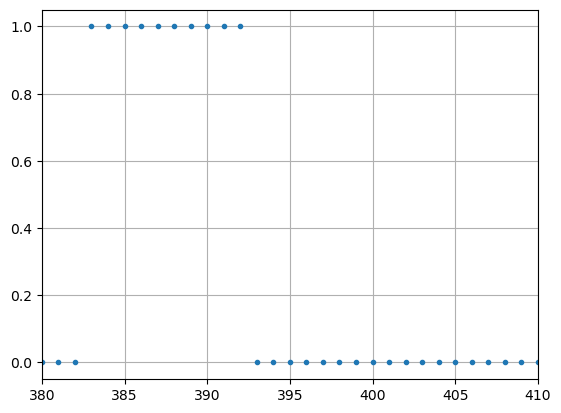

In [46]:
timeSousProdRenFR_temp.astype(int).plot(style='.')
plt.xlim(380, 410)
plt.grid()

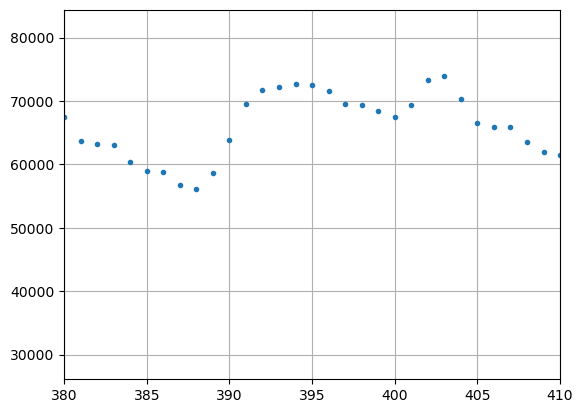

In [47]:
LoadFR['Actual Total Load [MW] - BZN|FR'].plot(style='.')
plt.xlim(380, 410)
plt.grid()

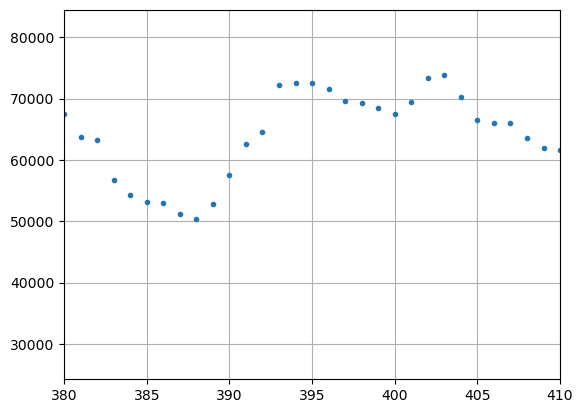

In [48]:
LoadFR_reduced.plot(style='.')
plt.xlim(380, 410)
plt.grid()

In [49]:
df ['France'][7]=round((FactorFR)*100,0)
df

,France,Allemagne (+LU)
Consommation totale [GWh],425429.0,461811.0
Consommation totale par habitant [kWh],6279.0,5508.0
Production totale [GWh],481831.0,463628.0
Production totale par habitant [kWh],7112.0,5530.0
Temps en sous-production [%],10.6,52.1
Temps en sous-production si que renouvelables [%],99.9,95.5
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable [%],1590.0,600
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production [%],1400,520.0
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - stockage zero pertes de 100W, 1000Wh /hab [%]",NaN,NaN
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production et stockage zero pertes 100W, 1000Wh /hab [%]",NaN,NaN


# Augmentation necessaire des renouvelables solaires et éoliennes pour atteindre moins de 10% de temps de sous-production en exclusivement renouvelable - stockage ideal 100W, 1000Wh /hab

Pour info:
Batterie de vélo electrique: 400Wh
Batterie de Dacia Spring: 30kWh

In [50]:
FactorDE=4.8
Pmax=0.0001*habDE
Emax=0.001*habDE
print('Pmax: ',Pmax,'MW     Emax: ',Emax,'MWh')
E=0
Estockage = pd.Series()
Pstockage = pd.Series()

Pmax:  8384.0 MW     Emax:  83840.0 MWh


In [51]:
SurProdDE=timeProdRenDE+timeProdRenScalableDE*FactorDE - LoadDE['Actual Total Load [MW] - BZN|DE-LU']
# Some NaN values may create problem, replace them by zero to fix the bug
SurProdDE = [0 if math.isnan(x) else x for x in SurProdDE]

In [52]:
for i,val in enumerate(SurProdDE):
    if SurProdDE[i] > 0:
        Pstockage[i]=-min(SurProdDE[i], Pmax, Emax-E)
        E=E-Pstockage[i]/4
    else:
        Pstockage[i]=min(-SurProdDE[i], Pmax, E)
        E=E-Pstockage[i]/4
    Estockage[i]=E
    #print(E)
 #Pstockage

In [53]:
Pstockage

0       -8.384000e+03
1       -8.384000e+03
2       -8.384000e+03
3       -8.384000e+03
4       -8.384000e+03
             ...     
35039   -2.910383e-11
35040   -2.910383e-11
35041   -2.910383e-11
35042   -2.910383e-11
35043   -2.910383e-11
Length: 35044, dtype: float64

In [54]:
Pstockage=Pstockage+1 #Ajoute 1 pour clarifier l'inégalité ci-dessous
timeSousProdRenDE_stockage = timeProdRenDE+timeProdRenScalableDE*FactorDE+Pstockage < LoadDE['Actual Total Load [MW] - BZN|DE-LU']
result=sum(timeSousProdRenDE_stockage)/len(ProdDE)*100
result

9.947494578244493

In [55]:
timeSousProdRenDE_stockage

0        False
1        False
2        False
3        False
4        False
         ...  
35039    False
35040    False
35041    False
35042    False
35043    False
Length: 35044, dtype: bool

In [56]:
df ['Allemagne (+LU)'][8]=round((FactorDE)*100,0)
df

,France,Allemagne (+LU)
Consommation totale [GWh],425429.0,461811.0
Consommation totale par habitant [kWh],6279.0,5508.0
Production totale [GWh],481831.0,463628.0
Production totale par habitant [kWh],7112.0,5530.0
Temps en sous-production [%],10.6,52.1
Temps en sous-production si que renouvelables [%],99.9,95.5
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable [%],1590.0,600
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production [%],1400,520.0
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - stockage zero pertes de 100W, 1000Wh /hab [%]",NaN,480.0
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production et stockage zero pertes 100W, 1000Wh /hab [%]",NaN,NaN


In [57]:
FactorFR=13.6
Pmax=0.0001*habFR
Emax=0.0010*habFR
print('Pmax: ',Pmax,'MW     Emax: ',Emax,'MWh')
E=0
Estockage = pd.Series()
Pstockage = pd.Series()

Pmax:  6775.0 MW     Emax:  67750.0 MWh


In [58]:
SurProdFR=timeProdRenFR+timeProdRenScalableFR*FactorFR - LoadFR['Actual Total Load [MW] - BZN|FR']
# Some NaN values may create problem, replace them by zero to fix the bug
SurProdFR = [0 if math.isnan(x) else x for x in SurProdFR]

In [59]:
for i,val in enumerate(SurProdFR):
    if SurProdFR[i] > 0:
        Pstockage[i]=-min(SurProdFR[i], Pmax, Emax-E)
        E=E-Pstockage[i]
    else:
        Pstockage[i]=min(-SurProdFR[i], Pmax, E)
        E=E-Pstockage[i]
    Estockage[i]=E
    #print(E)
 #Pstockage

In [60]:
SurProdFR.index

<function list.index(value, start=0, stop=9223372036854775807, /)>

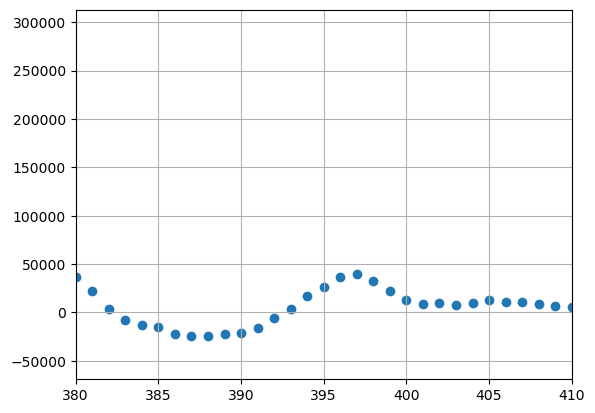

In [61]:
plt.scatter(range(len(SurProdFR)),SurProdFR)
plt.xlim(380, 410)
plt.grid()
plt.show()

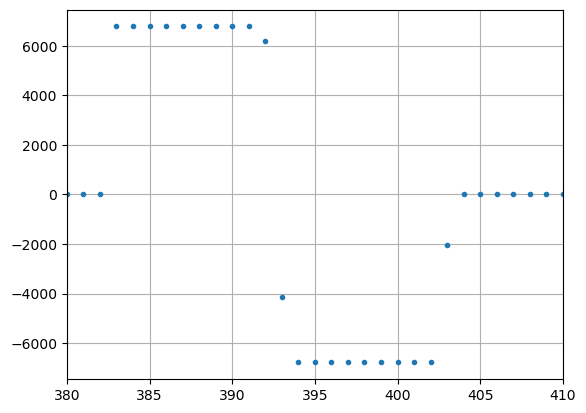

In [62]:
Pstockage.plot(style='.')
plt.xlim(380, 410)
plt.grid()

(380.0, 410.0)

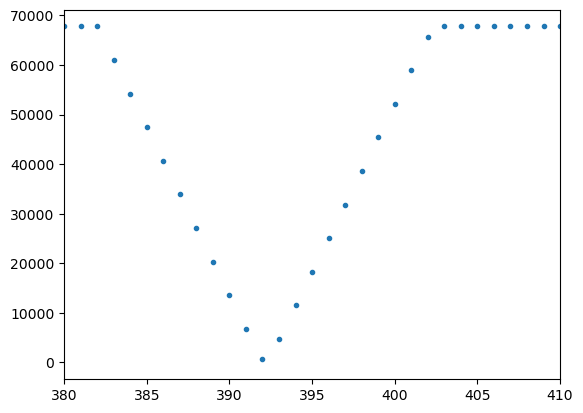

In [63]:
Estockage.plot(style='.')
plt.xlim(380, 410)

In [64]:
Pstockage=Pstockage+1 #Ajoute 1 pour clarifier l'inégalité ci-dessous
timeSousProdRenFR_stockage = timeProdRenFR+timeProdRenScalableFR*FactorFR+Pstockage < LoadFR['Actual Total Load [MW] - BZN|FR']
result=sum(timeSousProdRenFR_stockage)/len(ProdFR)*100
result

9.998858577787924

(380.0, 410.0)

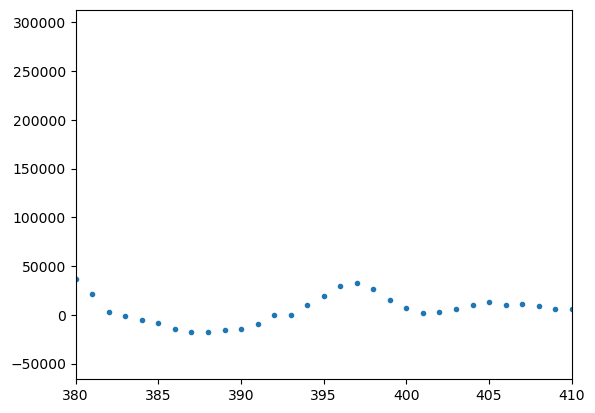

In [65]:
SousProdRenFR_stockage = timeProdRenFR+timeProdRenScalableFR*FactorFR+Pstockage - LoadFR['Actual Total Load [MW] - BZN|FR']
SousProdRenFR_stockage.plot(style='.')
plt.xlim(380, 410)

In [66]:
type(SousProdRenFR_stockage)

pandas.core.series.Series

(380.0, 410.0)

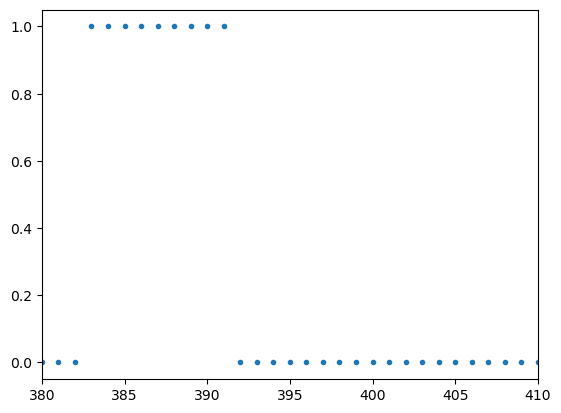

In [67]:
import matplotlib.pyplot as plt
timeSousProdRenFR_stockage.astype(int).plot(style='.')
plt.xlim(380, 410)

In [68]:
df ['France'][8]=round((FactorFR)*100,0)
df

,France,Allemagne (+LU)
Consommation totale [GWh],425429.0,461811.0
Consommation totale par habitant [kWh],6279.0,5508.0
Production totale [GWh],481831.0,463628.0
Production totale par habitant [kWh],7112.0,5530.0
Temps en sous-production [%],10.6,52.1
Temps en sous-production si que renouvelables [%],99.9,95.5
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable [%],1590.0,600
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production [%],1400,520.0
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - stockage zero pertes de 100W, 1000Wh /hab [%]",1360.0,480.0
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production et stockage zero pertes 100W, 1000Wh /hab [%]",NaN,NaN


# Augmentation necessaire des renouvelables solaires et éoliennes pour atteindre moins de 10% de temps de sous-production en exclusivement renouvelable - consommation de -10% en sous-production et stockage ideal 100W, 1000Wh /hab

In [69]:
FactorDE=4.1
habDE=83.2e6
Pmax=0.0001*habDE
Emax=0.001*habDE
print('Pmax: ',Pmax,'MW     Emax: ',Emax,'MWh')
E=0
Estockage = pd.Series()
Pstockage = pd.Series()

Pmax:  8320.0 MW     Emax:  83200.0 MWh


In [70]:
SurProdDE=timeProdRenDE+timeProdRenScalableDE*FactorDE - LoadDE['Actual Total Load [MW] - BZN|DE-LU']
# Some NaN values may create problem, replace them by zero to fix the bug
SurProdDE = [0 if math.isnan(x) else x for x in SurProdDE]

In [71]:
for i,val in enumerate(SurProdDE):
    if SurProdDE[i] > 0:
        Pstockage[i]=-min(SurProdDE[i], Pmax, Emax-E)
        E=E-Pstockage[i]/4
    else:
        Pstockage[i]=min(-SurProdDE[i], Pmax, E)
        E=E-Pstockage[i]/4
    Estockage[i]=E
    #print(E)
 #Pstockage

In [72]:
Pstockage=Pstockage+1 #Ajoute 1 pour clarifier l'inégalité ci-dessous
timeSousProdRenDE_stockage_temp = timeProdRenDE+timeProdRenScalableDE*FactorDE+Pstockage < LoadDE['Actual Total Load [MW] - BZN|DE-LU']
sum(timeSousProdRenDE_temp.astype(int))
LoadDE_reduced=LoadDE['Actual Total Load [MW] - BZN|DE-LU'].mul(0.9*timeSousProdRenDE_stockage_temp.astype(int), axis=0)+LoadDE['Actual Total Load [MW] - BZN|DE-LU'].mul(1-timeSousProdRenDE_stockage_temp.astype(int), axis=0)
timeSousProdRenDE_Stockage_LoadReduction = timeProdRenDE+timeProdRenScalableDE*FactorDE+Pstockage < LoadDE_reduced


result=sum(timeSousProdRenDE_Stockage_LoadReduction)/len(ProdDE)*100
result

9.833352357036867

In [73]:
df ['Allemagne (+LU)'][9]=round((FactorDE)*100,0)
df

,France,Allemagne (+LU)
Consommation totale [GWh],425429.0,461811.0
Consommation totale par habitant [kWh],6279.0,5508.0
Production totale [GWh],481831.0,463628.0
Production totale par habitant [kWh],7112.0,5530.0
Temps en sous-production [%],10.6,52.1
Temps en sous-production si que renouvelables [%],99.9,95.5
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable [%],1590.0,600
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production [%],1400,520.0
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - stockage zero pertes de 100W, 1000Wh /hab [%]",1360.0,480.0
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production et stockage zero pertes 100W, 1000Wh /hab [%]",NaN,410.0


In [74]:
FactorFR=11.8
Pmax=0.0001*habFR
Emax=0.0010*habFR
E=0
Estockage = pd.Series()
Pstockage = pd.Series()

In [75]:
SurProdFR=timeProdRenFR+timeProdRenScalableFR*FactorFR - LoadFR['Actual Total Load [MW] - BZN|FR']
# Some NaN values may create problem, replace them by zero to fix the bug
SurProdFR = [0 if math.isnan(x) else x for x in SurProdFR]

In [76]:
for i,val in enumerate(SurProdFR):
    if SurProdFR[i] > 0:
        Pstockage[i]=-min(SurProdFR[i], Pmax, Emax-E)
        E=E-Pstockage[i]
    else:
        Pstockage[i]=min(-SurProdFR[i], Pmax, E)
        E=E-Pstockage[i]
    Estockage[i]=E
    #print(E)
 #Pstockage

In [77]:
Pstockage=Pstockage+1 #Ajoute 1 pour clarifier l'inégalité ci-dessous
timeSousProdRenFR_stockage_temp = timeProdRenFR+timeProdRenScalableFR*FactorFR+Pstockage < LoadFR['Actual Total Load [MW] - BZN|FR']
sum(timeSousProdRenFR_temp.astype(int))
LoadFR_reduced=LoadFR['Actual Total Load [MW] - BZN|FR'].mul(0.9*timeSousProdRenFR_stockage_temp.astype(int), axis=0)+LoadFR['Actual Total Load [MW] - BZN|FR'].mul(1-timeSousProdRenFR_stockage_temp.astype(int), axis=0)
timeSousProdRenFR_Stockage_LoadReduction = timeProdRenFR+timeProdRenScalableFR*FactorFR+Pstockage < LoadFR_reduced


result=sum(timeSousProdRenFR_Stockage_LoadReduction)/len(ProdFR)*100
result

9.907544800821825

In [78]:
df ['France'][9]=round((FactorFR)*100,0)
df

,France,Allemagne (+LU)
Consommation totale [GWh],425429.0,461811.0
Consommation totale par habitant [kWh],6279.0,5508.0
Production totale [GWh],481831.0,463628.0
Production totale par habitant [kWh],7112.0,5530.0
Temps en sous-production [%],10.6,52.1
Temps en sous-production si que renouvelables [%],99.9,95.5
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable [%],1590.0,600
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production [%],1400,520.0
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - stockage zero pertes de 100W, 1000Wh /hab [%]",1360.0,480.0
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production et stockage zero pertes 100W, 1000Wh /hab [%]",1180.0,410.0


In [79]:
df

,France,Allemagne (+LU)
Consommation totale [GWh],425429.0,461811.0
Consommation totale par habitant [kWh],6279.0,5508.0
Production totale [GWh],481831.0,463628.0
Production totale par habitant [kWh],7112.0,5530.0
Temps en sous-production [%],10.6,52.1
Temps en sous-production si que renouvelables [%],99.9,95.5
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable [%],1590.0,600
Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production [%],1400,520.0
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - stockage zero pertes de 100W, 1000Wh /hab [%]",1360.0,480.0
"Augmentation necessaire des renouvelables solaires et éoliennes pour un temps en sous-production <10% en exclusivement renouvelable - consommation de -10% en cas de sous-production et stockage zero pertes 100W, 1000Wh /hab [%]",1180.0,410.0


In [81]:
df.to_csv('resultTable.csv')